In [84]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf
import matplotlib.pyplot as plt

# EDA

### Data exploration

In [85]:
nyc_df = pd.read_csv('nyc_data.csv', index_col=0, parse_dates=True)
nyc_df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [86]:
nyc_df = nyc_df.rename(columns={'Demand':'y'})
nyc_df.head(1)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305


In [87]:
nyc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,2192.0,756.059227,152.143070,425.77532,641.161123,736.94763,855.645886,1384.908525
Easter,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Thanksgiving,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Christmas,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Temperature,2192.0,15.012655,8.772751,-8.85000,7.767500,14.89500,23.230000,30.900000
Marketing,2192.0,126.675890,58.274047,24.58900,78.303500,122.76450,169.395250,299.860000


### Seasonal decomposition

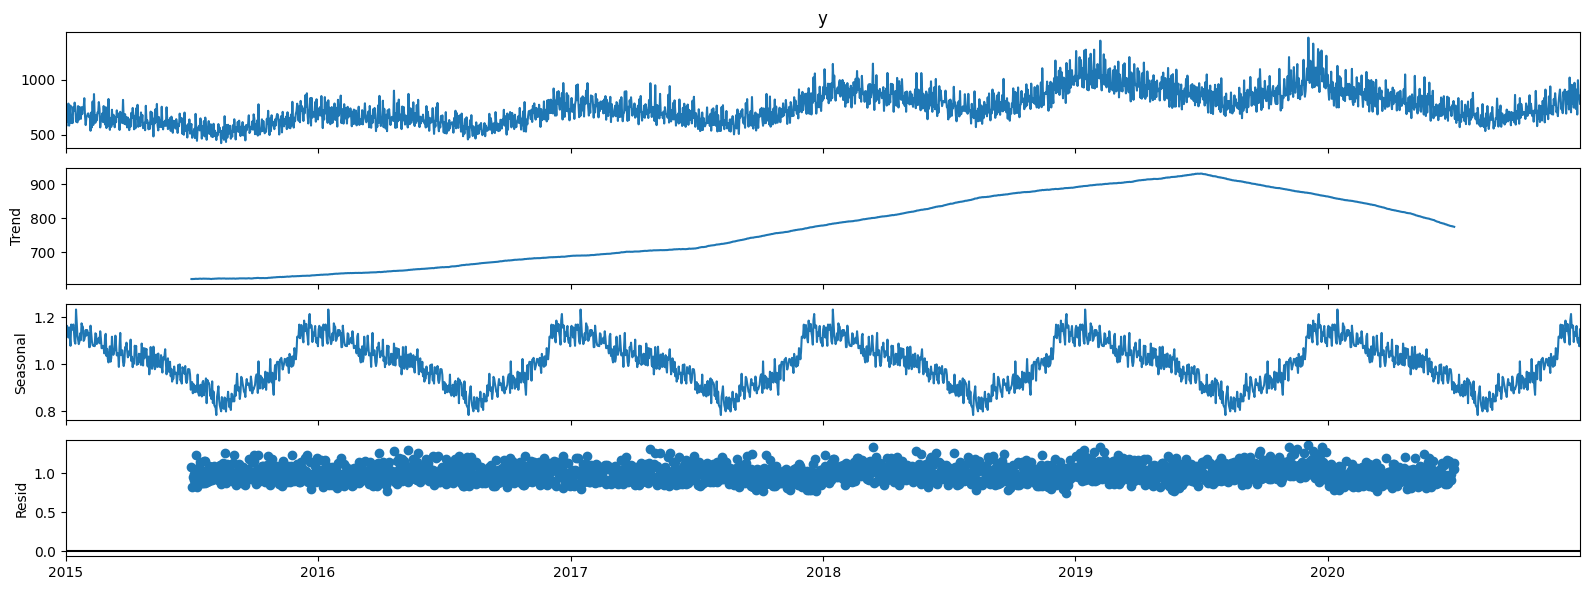

In [88]:
decomposition = seasonal_decompose(x=nyc_df.y, model="multiplicative", period=365)
decomposition.plot();

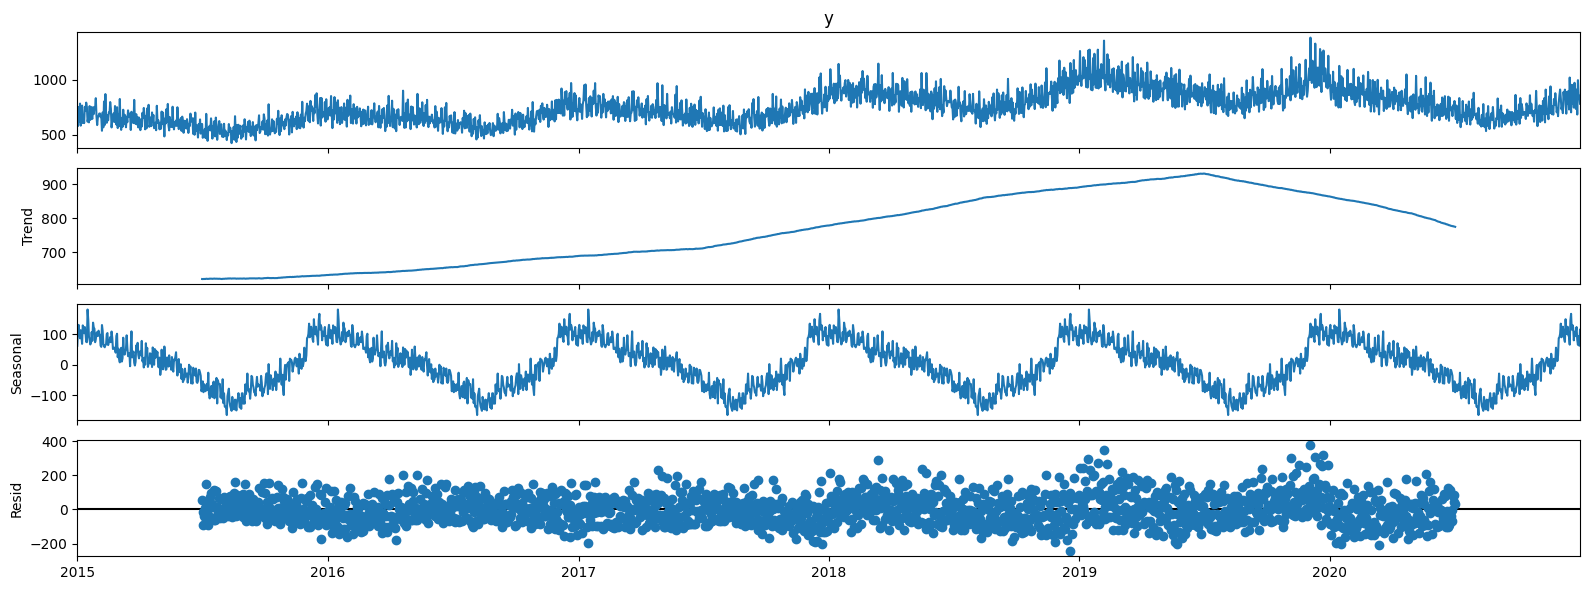

In [89]:
decomposition = seasonal_decompose(x=nyc_df.y, model="additive", period=365)
decomposition.plot();

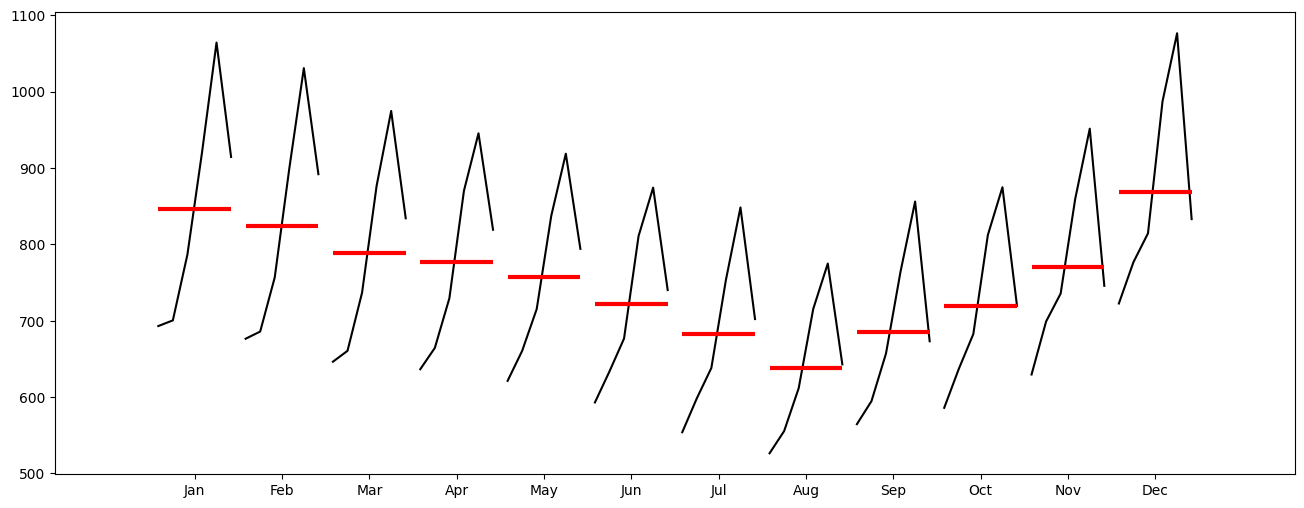

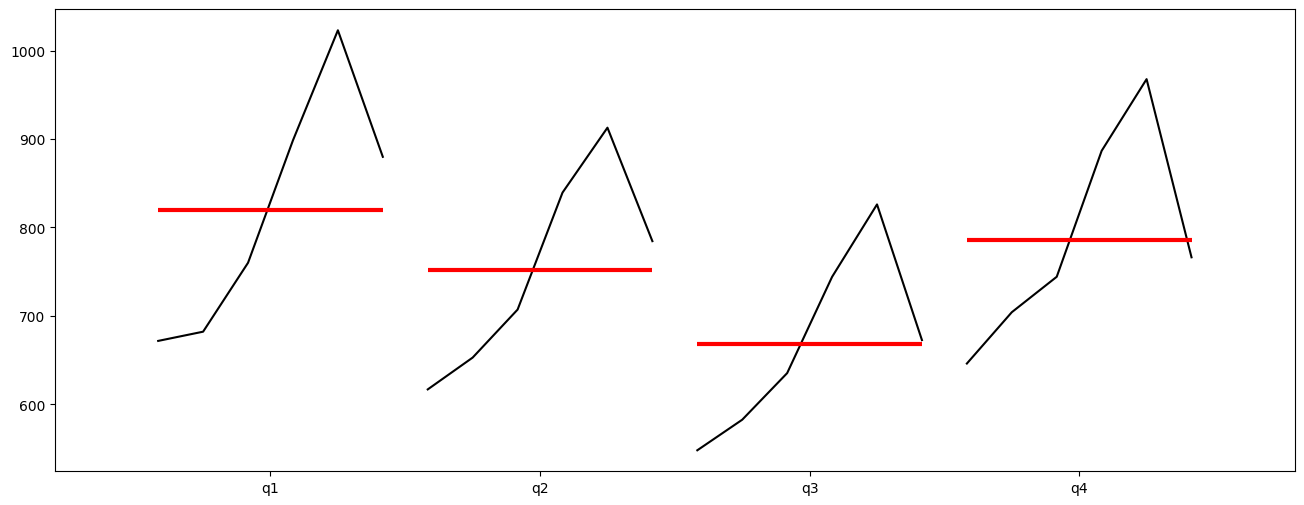

In [90]:
month_plot(nyc_df.y.resample('MS').mean());
quarter_plot(nyc_df.y.resample('QS').mean());

### Data visualization

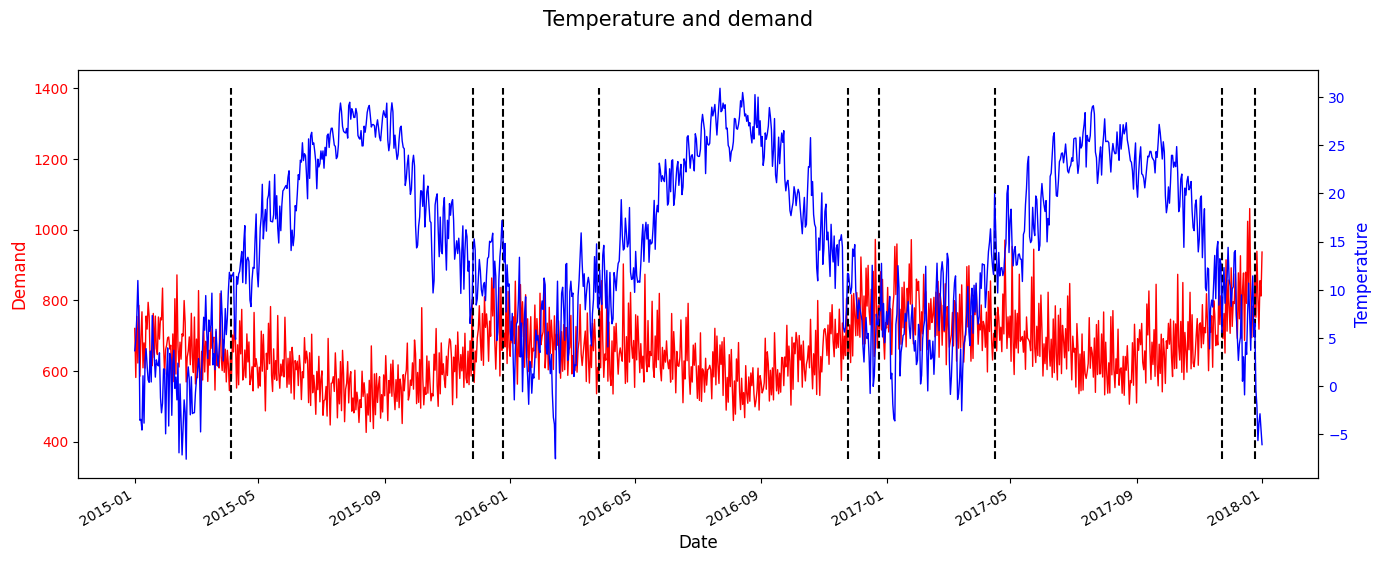

In [91]:
df_plot = nyc_df.loc['2015-01-01':'2018-01-01']

fig, ax1 = plt.subplots(figsize=(16, 6))
ax2 = ax1.twinx()
ax1.plot(df_plot.index, df_plot.y, color = 'red', lw=1)
ax2.plot(df_plot.index, df_plot.Temperature, color = 'blue', lw=1)
fig.suptitle("Temperature and demand", fontsize=15)
fig.autofmt_xdate()
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Demand', fontsize=12, color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel('Temperature', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

events = df_plot[(df_plot.Easter == 1) | (df_plot.Thanksgiving == 1) | (df_plot.Christmas == 1)].index
ax1.vlines(events, ymin=350, ymax=1400, color='black', ls = '--');

### Correlation

In [92]:
nyc_df[['y', 'Temperature', 'Marketing']].corr()

,y,Temperature,Marketing
y,1.000000,-0.400261,0.275139
Temperature,-0.400261,1.000000,-0.185626
Marketing,0.275139,-0.185626,1.000000


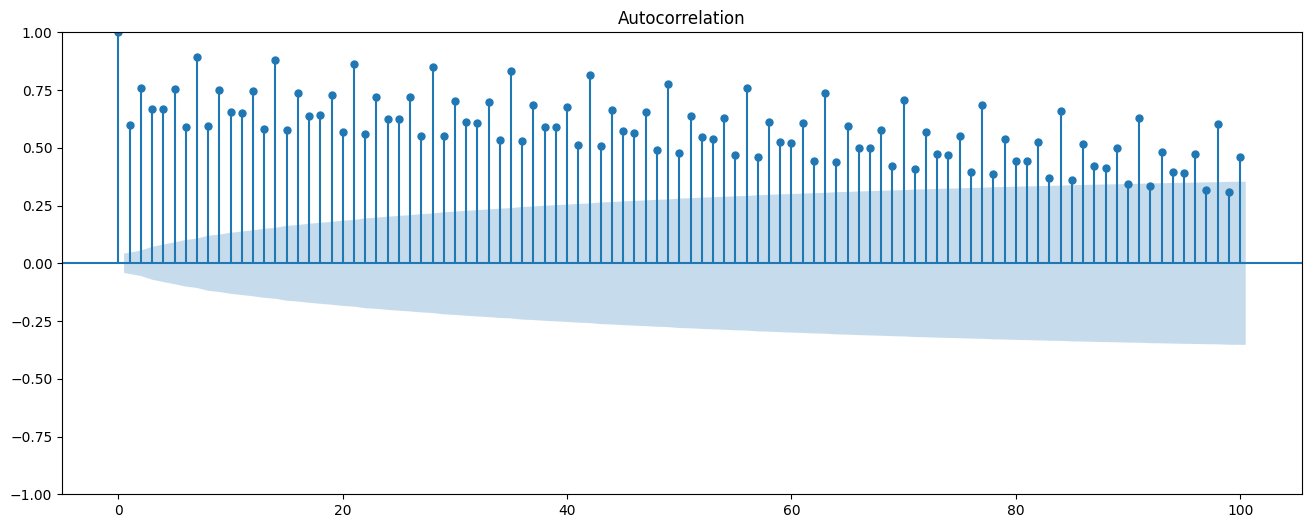

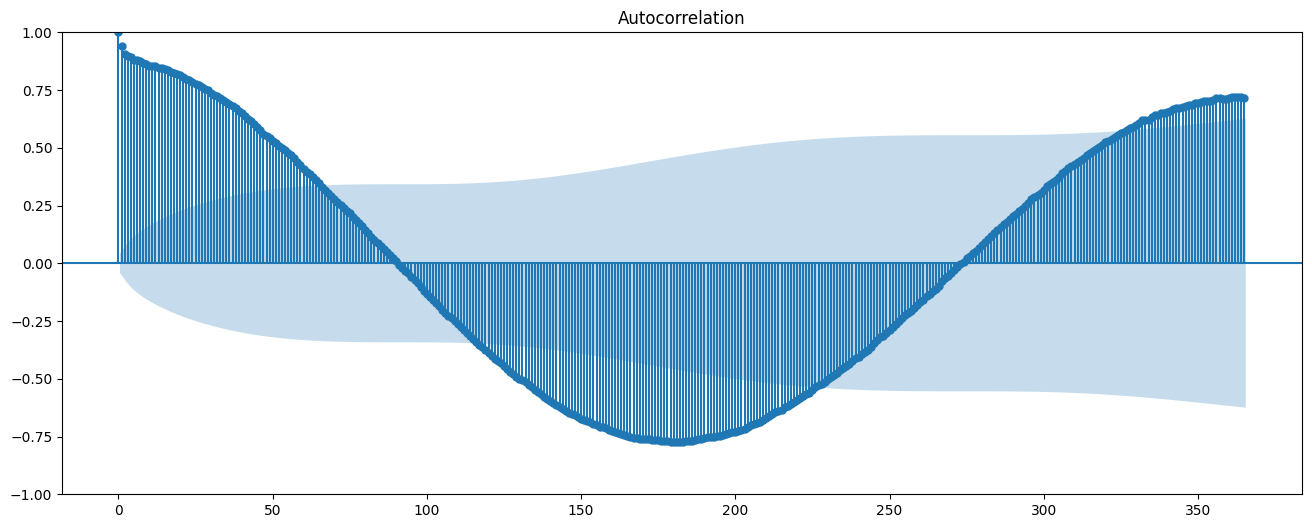

In [93]:
plt.rcParams["figure.figsize"] = (16, 6)
plot_acf(nyc_df.y, lags=100)
plot_acf(nyc_df.Temperature, lags=365);

# Using Prophet

In [98]:
df = pd.read_csv('nyc_data.csv')
df = df.rename(columns={'Demand':'y'})
df.Date = pd.to_datetime(df.Date, format="%m/%d/%Y")
df.head()

,Date,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,2015-01-01,720.000885,0,0,0,3.68,41.305
1,2015-01-02,581.276773,0,0,0,4.73,131.574
2,2015-01-03,754.117039,0,0,0,7.23,162.700
3,2015-01-04,622.252774,0,0,0,10.96,160.281
4,2015-01-05,785.373319,0,0,0,6.92,51.077
